In [46]:
import cv2 as cv
import matplotlib.pyplot as plt
import pytesseract


In [47]:
from src.processamento import *
from PIL import*

# Teste 1: Leitor da Biblia


## Processamento

#### Imagem Original

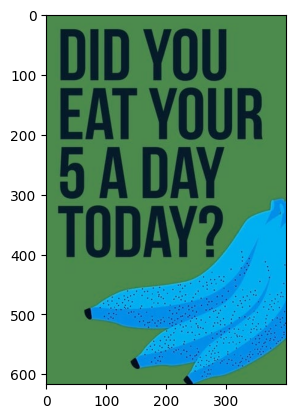

In [48]:
dir="data\images\Poster.jpg"
img = lerImagem(dir)
mostrar(img)

### Imagem pré processada

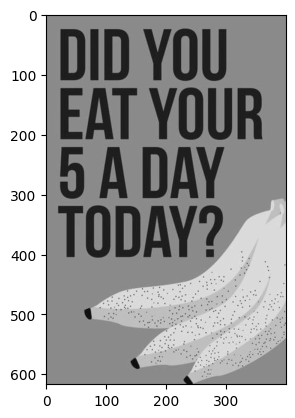

In [49]:
imgCinza = escalaCinza(img)
mostrar(imgCinza)

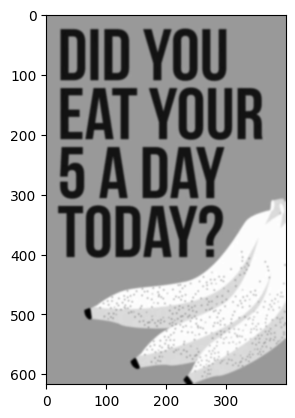

In [50]:

gauss = gaussiano(imgCinza, 7, 7)

mostrar(gauss)

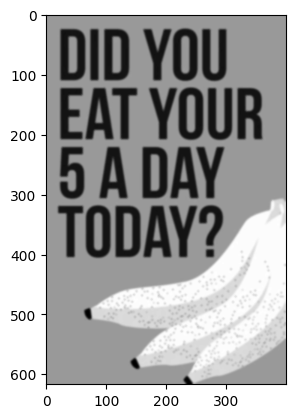

In [51]:
imgSemRuido=removerRuido(gauss,3)

mostrar(imgSemRuido)

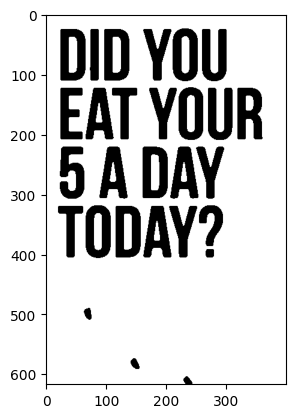

In [52]:
imgTrasholding = thresholding(imgSemRuido)
#thres = gaussian_thresholding(grey)

mostrar(imgTrasholding)

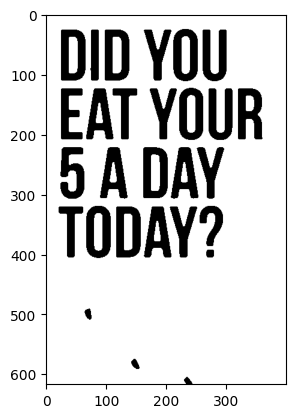

In [53]:
imgProcessada = imgTrasholding
imgProcessada = dilatarImg(imgProcessada, iterations=1)

mostrar(imgProcessada)

## Separar Caracteres

### Segmentação Processada

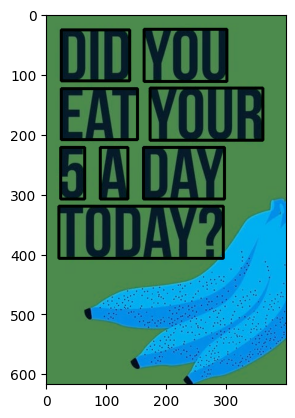

In [54]:
mostrar(palavraBlocoImg(imgProcessada.copy(), (0, 2, 0), img=img.copy()))

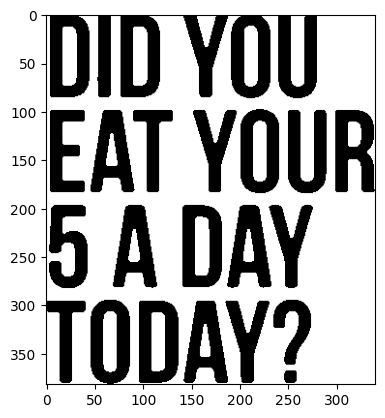

['']


In [55]:
dadosImg= pegarDados(imgProcessada)
segmento = list()
segmentoTxt = list()

for i in range(len(dadosImg['text'])):
    (x, y, w, h) = (dadosImg['left'][i], dadosImg['top'][i], dadosImg['width'][i], dadosImg['height'][i])
    corteImg = imgProcessada[y:y+h, x:x+w]
    if dadosImg['level'][i] == 2:
        segmento.append(corteImg)
        #print(img_dict['text'][i])
        segmentoTemp= ocr(corteImg)
        j=0
        mostrar(corteImg)
        try:
            while (segmentoTemp=='' and j<=12):
                corteImg=imgProcessada[y-j:y+h+j,x-j:x+w+j]
                segmentoTemp= ocr(corteImg)
                j=j+2
        except (SystemError,AttributeError):
            pass 
       
        segmentoTxt.append(segmentoTemp)
        # print(segment_txt)
print(segmentoTxt)
# segmentoTxt.pop()

### Segmentação Original

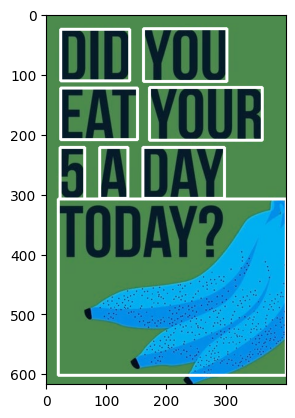

In [56]:
mostrar(palavraBlocoImg(img.copy(), (255,255,255)))

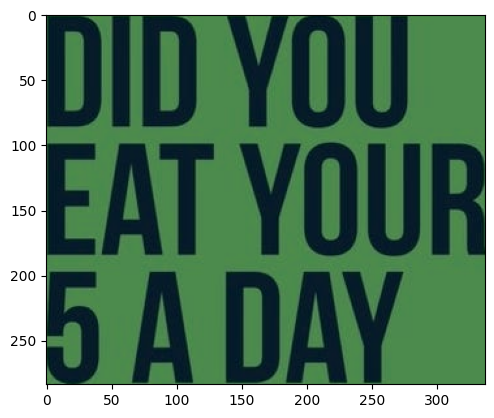

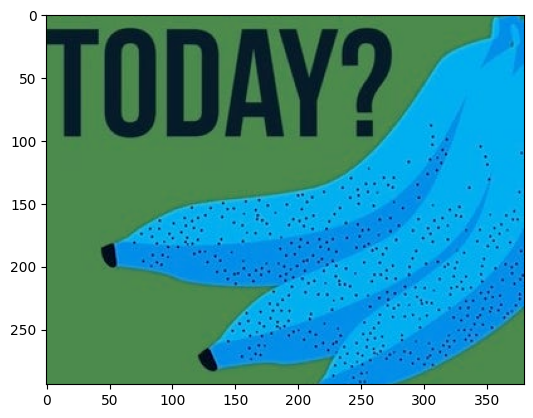

['', 'TODAY?\n']


In [57]:
dadosImgOriginal= pegarDados(img)
segmentoOriginal = list()
segmentoTxtOriginal = list()

for i in range(len(dadosImgOriginal['text'])):
    (x, y, w, h) = (dadosImgOriginal['left'][i], dadosImgOriginal['top'][i], dadosImgOriginal['width'][i], dadosImgOriginal['height'][i])
    corteImg = img[y:y+h, x:x+w]
    if dadosImgOriginal['level'][i] == 2:
        segmentoOriginal.append(corteImg)
        segmentoTemp= ocr(corteImg)
        j=0
        mostrar(corteImg)
        try:
            while (segmentoTemp=='' and j<=12):
                corteImg=img[y-j:y+h+j,x-j:x+w+j]
                segmentoTemp= ocr(corteImg)
                j=j+2
        except (SystemError,AttributeError,ValueError)as e:
            pass 
        #print(img_dict['text'][i])
        segmentoTxtOriginal.append(segmentoTemp)
        # print(segment_txt)
print(segmentoTxtOriginal)

## OCR

In [58]:
textImgOriginal = ocr(img)
textImgProcessada = ocr(imgProcessada)
segmentoTxt = ' '.join(segmentoTxt)
segmentoTxtOriginal = ' '.join(segmentoTxtOriginal)



In [59]:
print(textImgOriginal)

DID YOU
EAT YOUR
9 A DAY

TUDAY?.



In [60]:
print(textImgProcessada)

DID YOU
EAT YOUR
9 À DAY
TODAY?



In [61]:
print(segmentoTxt)

In [62]:
print(segmentoTxtOriginal)

 TODAY?



## Pos-Processamento

### Texto imagem Original


In [63]:
textOriginalPos = removerEspaçoDuplo(textImgOriginal)
textOriginalPos=removerNumeros(textOriginalPos)
textOriginalPos = removerLetraSolo(textOriginalPos, keep_e=True, keep_a=True)
print(textOriginalPos)

DID YOU EAT YOUR  A DAY TUDAY?. 


### Texto da imagem Original Segmentada

In [64]:
segmentoTxtOriginalPos = removerQuebra(segmentoTxtOriginal, add_space=True)
segmentoTxtOriginalPos = removerNumeros(segmentoTxtOriginalPos)
segmentoTxtOriginalPos = removerEspaçoDuplo(segmentoTxtOriginalPos)
segmentoTxtOriginalPos = removerLetraSolo(segmentoTxtOriginalPos)
print(segmentoTxtOriginalPos)

 TODAY? 


### Texto da Imgem Processada


In [65]:
textImgProcessadaPos = removerEspaçoDuplo(textImgProcessada)
textImgProcessadaPos=removerNumeros(textImgProcessadaPos)
textImgProcessadaPos = removerLetraSolo(textImgProcessadaPos, keep_e=True, keep_a=True)
print(textImgProcessadaPos)

DID YOU EAT YOUR  À DAY TODAY? 


### Texto da imagem Processada e Segmentada

In [66]:
segmentoTxtPos = removerEspaçoDuplo(segmentoTxt)
segmentoTxtPos = removerNumeros(segmentoTxtPos)
segmentoTxtPos = removerLetraSolo(segmentoTxtPos)
print(segmentoTxtPos)